In [1]:
import networkx as nx
import random
import matplotlib.pyplot as plt
random.seed(a=0)
import sir

In [2]:
p=0.03
r=14
n = 10000
m = 5

frac = 0.001
results = {}
# randomly infect - protect celebrities
G = nx.barabasi_albert_graph(n, m, seed=0)
initially_infected = random.choices(list(range(0,n)), k=int(n*frac))

celebrities = {}
degrees = {}
for node, deg in G.degree:
    degrees[node] = deg

for top in [0, 100, 300,500]:
    if top > 0:
        top_nodes = list({k: v for k, v in sorted(degrees.items(), key=lambda item: item[1], reverse=True)}.keys())[:top]
        infected = sir.sir_simulate(G, p, r, initially_infected, top_nodes)
    else:
        infected = sir.sir_simulate(G, p, r, initially_infected)
    celebrities[top] = infected

results['celebrities'] = celebrities

In [3]:
# randomly infect - random protection
G = nx.barabasi_albert_graph(n, m, seed=0)
initially_infected = random.choices(list(range(0,n)), k=int(n*frac))

random_protected = {}
for top in [0, 100, 300,500,1000]:
    if top > 0:
        top_nodes = random.choices(list(range(0,n)), k=top)
        infected = sir.sir_simulate(G, p, r, initially_infected, top_nodes)
    else:
        infected = sir.sir_simulate(G, p, r, initially_infected)
    random_protected[top] = infected
results['random'] = random_protected

(0, 8000)

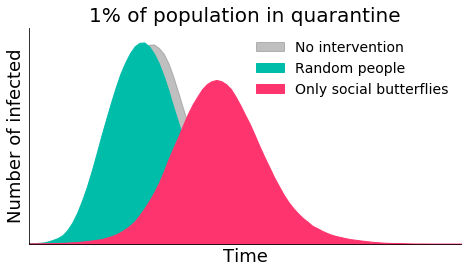

In [16]:
fig = plt.figure(figsize=(6, 3))
ax = fig.add_axes([0,0,1,1])

d = results['celebrities'][0]
ax.fill_between(range(0, len(d)), d, label = 'No intervention', color='grey', alpha=0.5)

d = results['random'][100]
ax.fill_between(range(0, len(d)), d, label = 'Random people', color='#00bdaa')

d = results['celebrities'][100]
ax.fill_between(range(0, len(d)), d, label = 'Only social butterflies', color='#fe346e')

ax.set_title('1% of population in quarantine', fontsize=20)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.get_xaxis().set_ticks([])
ax.get_yaxis().set_ticks([])
ax.set_xlabel('Time', fontsize = 18)
ax.set_ylabel('Number of infected', fontsize = 18)

ax.legend(fontsize=14, frameon=False)
ax.set_xlim(left=0, right=90)
ax.set_ylim(top=8000, bottom=0)

(0, 8000)

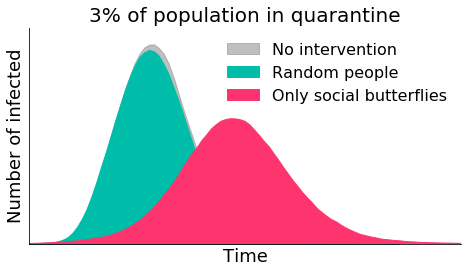

In [11]:
fig = plt.figure(figsize=(6, 3))
ax = fig.add_axes([0,0,1,1])

d = results['celebrities'][0]
ax.fill_between(range(0, len(d)), d, label = 'No intervention', color='grey', alpha=0.5)

d = results['random'][300]
ax.fill_between(range(0, len(d)), d, label = 'Random people', color='#00bdaa')

d = results['celebrities'][300]
ax.fill_between(range(0, len(d)), d, label = 'Only social butterflies', color='#fe346e')

ax.set_title('3% of population in quarantine', fontsize=20)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.get_xaxis().set_ticks([])
ax.get_yaxis().set_ticks([])
ax.set_xlabel('Time', fontsize = 18)
ax.set_ylabel('Number of infected', fontsize = 18)

ax.legend(fontsize=16, frameon=False)
ax.set_xlim(left=0, right=90)
ax.set_ylim(top=8000, bottom=0)

(0, 8000)

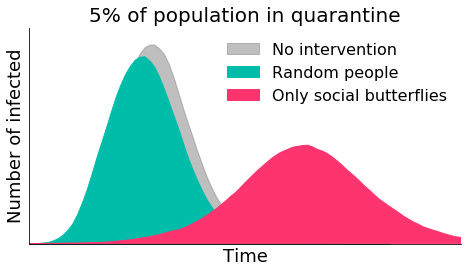

In [12]:
fig = plt.figure(figsize=(6, 3))
ax = fig.add_axes([0,0,1,1])

d = results['celebrities'][0]
ax.fill_between(range(0, len(d)), d, label = 'No intervention', color='grey', alpha=0.5)

d = results['random'][500]
ax.fill_between(range(0, len(d)), d, label = 'Random people', color='#00bdaa')

d = results['celebrities'][500]
ax.fill_between(range(0, len(d)), d, label = 'Only social butterflies', color='#fe346e')

ax.set_title('5% of population in quarantine', fontsize=20)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.get_xaxis().set_ticks([])
ax.get_yaxis().set_ticks([])
ax.set_xlabel('Time', fontsize = 18)
ax.set_ylabel('Number of infected', fontsize = 18)
ax.set_xlabel('Time', fontsize = 18)
ax.set_ylabel('Number of infected', fontsize = 18)

ax.legend(fontsize=16, frameon=False)
ax.set_xlim(left=0, right=90)
ax.set_ylim(top=8000, bottom=0)